In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insights
##### ranges of each columns
* Glucose:40-200
* Skin:10-99mm
* BP:50-120
* BMI:18-70
* insulin:15-900
* DPF:0.078-2.5

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0,df[cols_with_zero].median())
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


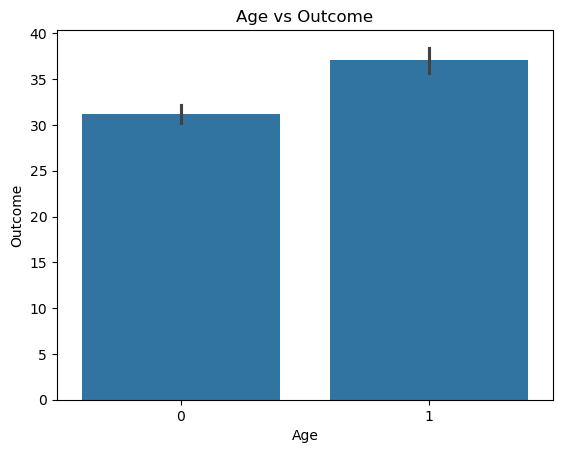

In [8]:
x=df['Outcome']
y=df['Age']
sns.barplot(x=x, y=y)
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Age vs Outcome')
plt.show()

In [9]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: xlabel='Outcome', ylabel='Age'>

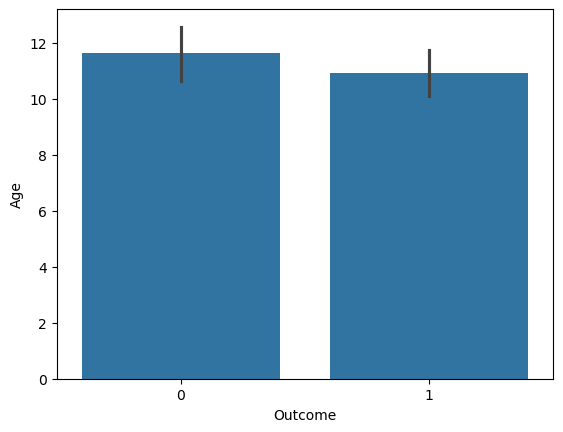

In [10]:
sns.barplot(x='Outcome',y='Age',estimator=np.std,data=df)

<Axes: xlabel='Age', ylabel='Count'>

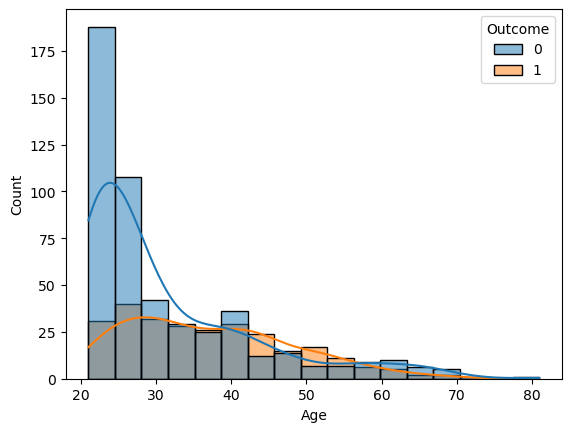

In [11]:
sns.histplot(x="Age",hue="Outcome",data=df,kde=True)

In [12]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
da=df['Age'][df['Outcome']==1]
dn=df['Age'][df['Outcome']==0]
stat,p=ttest_ind(da,dn)
alpha=0.05
if p<alpha:
    print("reject hypothesis")
else:
    print("accept hypothesis")

reject hypothesis


In [14]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.880200
1    35.381343
Name: BMI, dtype: float64

<Axes: xlabel='Outcome', ylabel='BMI'>

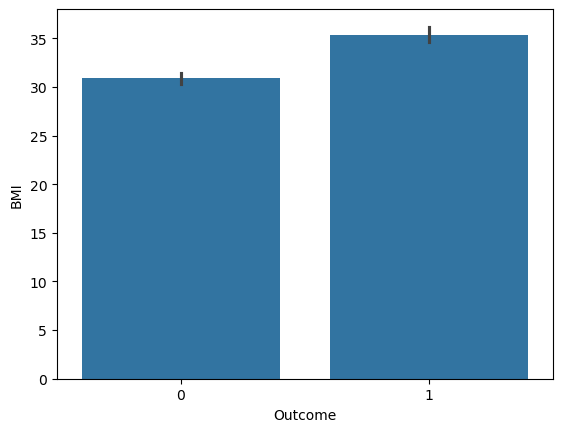

In [15]:
sns.barplot(x='Outcome',y='BMI',data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

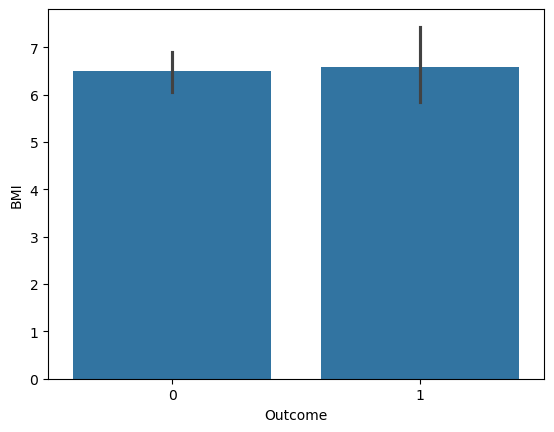

In [16]:
sns.barplot(x='Outcome',y='BMI',estimator=np.std,data=df)

<Axes: xlabel='BMI', ylabel='Count'>

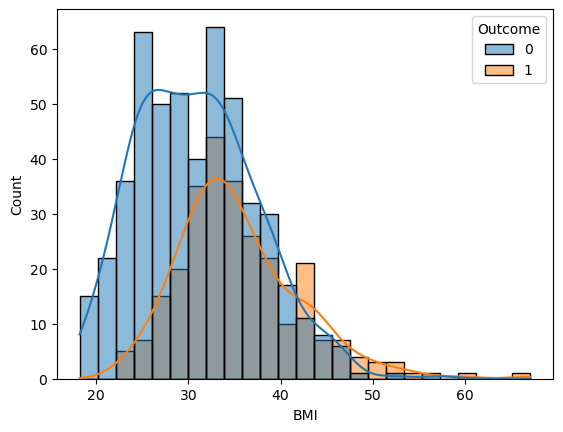

In [17]:
sns.histplot(x="BMI",hue="Outcome",data=df,kde=True)

In [18]:
dab=df['BMI'][df['Outcome']==1]
dnb=df['BMI'][df['Outcome']==0]
stat,p=ttest_ind(dab,dnb)
if p<alpha:
    print("reject hypothesis")
else:
    print("accept hypothesis")

reject hypothesis


In [19]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

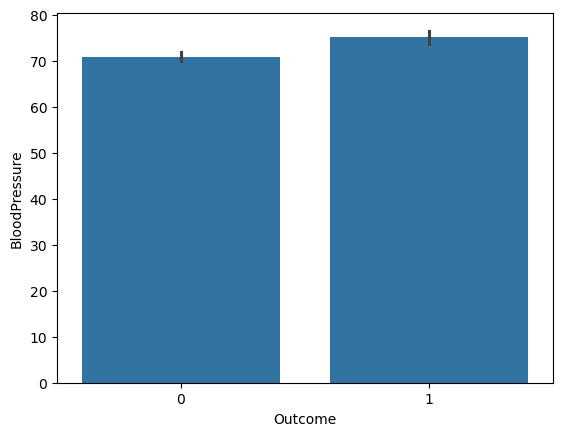

In [20]:
sns.barplot(x='Outcome',y='BloodPressure',data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

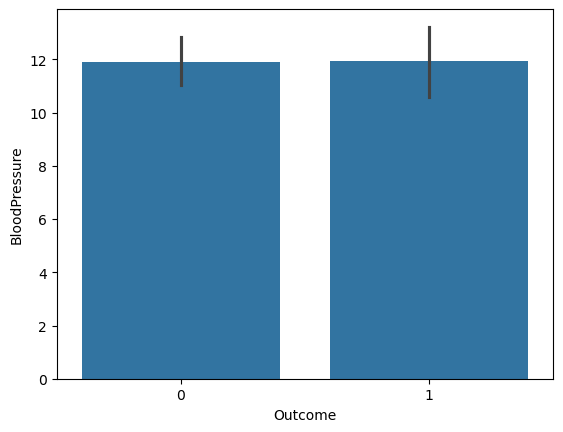

In [21]:
sns.barplot(x='Outcome',y='BloodPressure',estimator=np.std,data=df)

<Axes: xlabel='BloodPressure', ylabel='Count'>

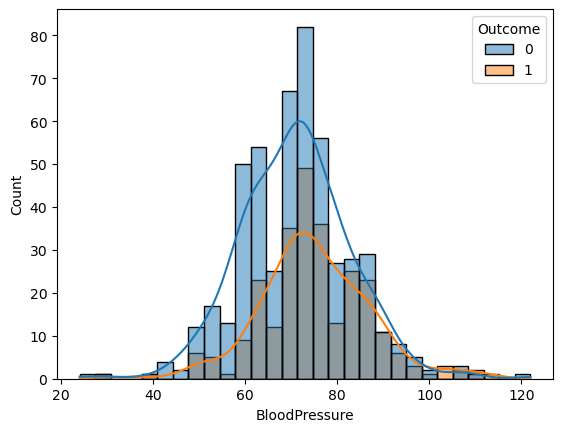

In [22]:
sns.histplot(x="BloodPressure",hue="Outcome",data=df,kde=True)

In [23]:
bp=df['BloodPressure'][df['Outcome']==1]
bpn=df['BloodPressure'][df['Outcome']==0]
stat,p=ttest_ind(bp,bpn)
if p<alpha:
    print("reject hypothesis")
else:
    print("accept hypothesis")

reject hypothesis


In [24]:
df['SkinThickness'].groupby(df['Outcome']).mean()

Outcome
0    26.058000
1    29.716418
Name: SkinThickness, dtype: float64

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

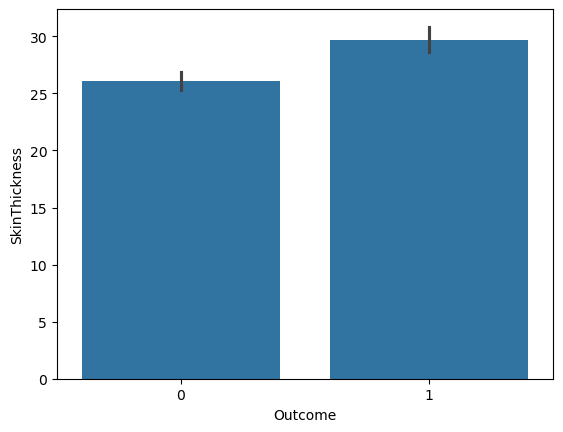

In [25]:
sns.barplot(x='Outcome',y='SkinThickness',data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

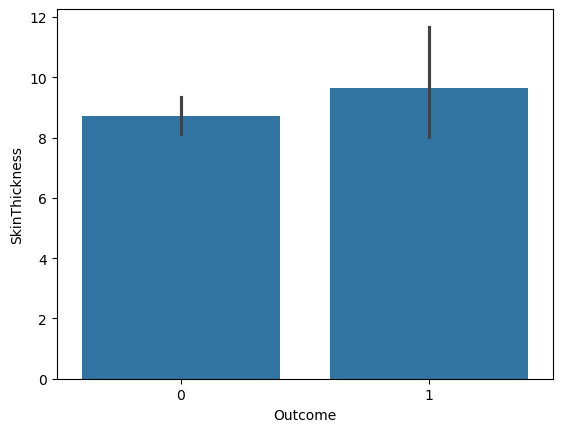

In [26]:
sns.barplot(x='Outcome',y='SkinThickness',estimator=np.std,data=df)


<Axes: xlabel='SkinThickness', ylabel='Count'>

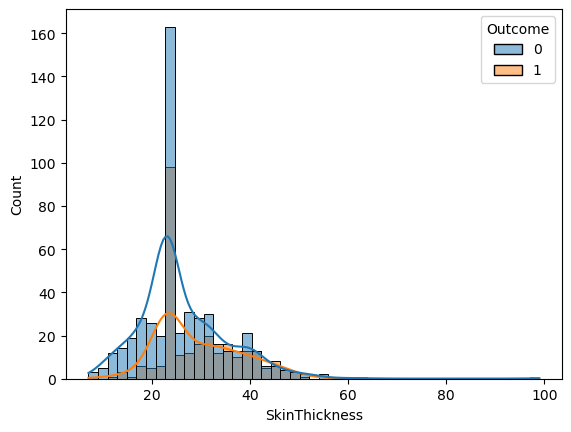

In [27]:
sns.histplot(x='SkinThickness',hue="Outcome",data=df,kde=True)

In [28]:
st=df['SkinThickness'][df['Outcome']==1]
stn=df['SkinThickness'][df['Outcome']==0]
stat,p=ttest_ind(st,stn)
if p<alpha:
    print("reject hypothesis")
else:
    print("accept hypothesis")

reject hypothesis


In [29]:
df['Insulin'].groupby(df['Outcome']).mean()

Outcome
0     83.188000
1    116.041045
Name: Insulin, dtype: float64

<Axes: xlabel='Outcome', ylabel='Insulin'>

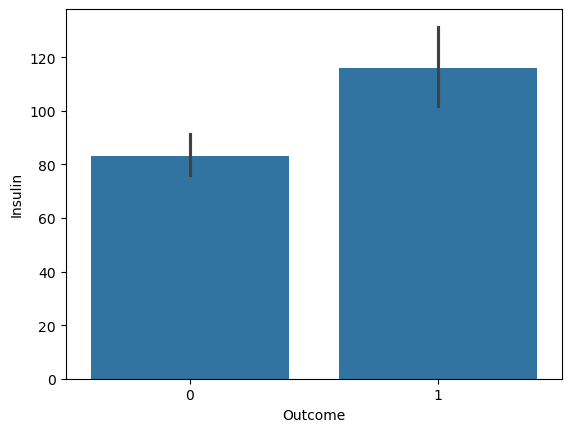

In [30]:
sns.barplot(x='Outcome',y='Insulin',data=df)

<Axes: xlabel='Outcome', ylabel='Insulin'>

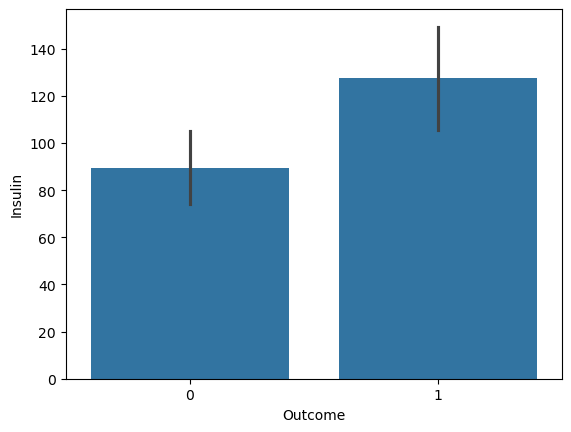

In [31]:
sns.barplot(x='Outcome',y='Insulin',estimator=np.std,data=df)

<Axes: xlabel='Insulin', ylabel='Count'>

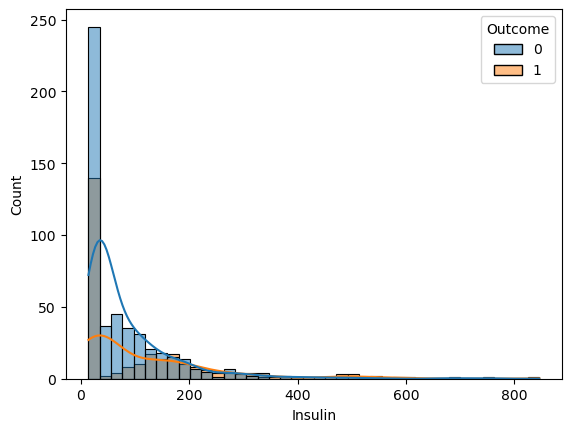

In [32]:
sns.histplot(x="Insulin",hue="Outcome",data=df,kde=True)

In [33]:
ip=df['Insulin'][df['Outcome']==1]
n=df['Insulin'][df['Outcome']==0]
stat,p=ttest_ind(ip,n)
if p<alpha:
    print("reject hypothesis")
else:
    print("accept hypothesis")

reject hypothesis


In [34]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df=df[~((df<lower_bound) | (df>upper_bound))]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85,66.0,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183,64.0,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137,40.0,35.0,168.0,43.1,NaN,33.0,1


In [35]:
df['Pregnancies'].fillna(df['Pregnancies'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isnull().sum()


C:\Users\yashw\AppData\Local\Temp\ipykernel_1896\3968769062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].fillna(df['Pregnancies'].median(),inplace=True)
C:\Users\yashw\AppData\Local\Temp\ipykernel_1896\3968769062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("test Accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

test Accuracy: 0.7467532467532467
Confusion Matrix:
 [[79 20]
 [19 36]]


In [38]:
accuracy=accuracy_score(y_train,model.predict(X_train))
print("train Accuracy:",accuracy)

train Accuracy: 0.7817589576547231
